In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("Group_8_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [4]:
X=df[['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'Type_H', 'Type_L', 'Type_M']]
y=df['failure']

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  stratify=y,test_size=0.2, random_state=42)

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train1,y_train1)


In [7]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = RandomForestClassifier(n_estimators = 36, 
                               max_features = "sqrt", 
                               max_depth = 20,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=36, oob_score=True)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


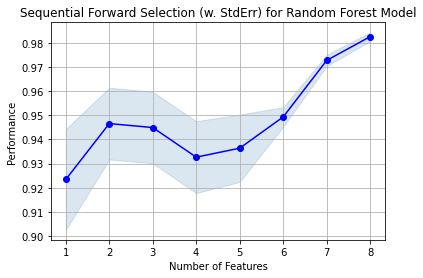

In [9]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(model, 
          k_features=8, 
          forward=True, 
          floating=False, 
          cv=5)

sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr) for Random Forest Model')
plt.grid()
plt.show()

In [10]:

from sklearn.linear_model import LinearRegression
sffs = SFS(model,
           k_features=8,
           forward=True,
           floating=True,
           scoring='recall',
           cv = 0)
#Use SFS to select the top 6 features 
feature_names=X.columns
sffs.fit(X_train1, y_train1, custom_feature_names=feature_names)

#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)",[0.3103448275862069],0.310345,"(torque,)"
2,"(2, 3)",[0.9359605911330049],0.935961,"(rot_speed, torque)"
3,"(0, 2, 3)",[0.9802955665024631],0.980296,"(air_temp, rot_speed, torque)"
4,"(0, 1, 3, 4)",[0.9950738916256158],0.995074,"(air_temp, process_temp, torque, tool_wear)"
5,"(0, 1, 3, 4, 6)",[1.0],1.0,"(air_temp, process_temp, torque, tool_wear, Ty..."
6,"(0, 1, 3, 4, 6, 7)",[1.0],1.0,"(air_temp, process_temp, torque, tool_wear, Ty..."
7,"(0, 1, 3, 4, 5, 6, 7)",[0.9950738916256158],0.995074,"(air_temp, process_temp, torque, tool_wear, Ty..."
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[1.0],1.0,"(air_temp, process_temp, rot_speed, torque, to..."


In [11]:
features_selected=df_SFFS_results['feature_names'][8]
t=list(features_selected)
t

['air_temp',
 'process_temp',
 'rot_speed',
 'torque',
 'tool_wear',
 'Type_H',
 'Type_L',
 'Type_M']

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train[t], y_train)
forest_y_pred = model.predict(X_valid[t])
print(f"Random Forest Classification Report on validation data using bidirectional elemination(wrapper method)")
cm=confusion_matrix(y_valid, forest_y_pred)
print(cm)
print(classification_report(y_valid, forest_y_pred), "\n")

Random Forest Classification Report on validation data using bidirectional elemination(wrapper method)
[[1876   56]
 [  23   45]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.45      0.66      0.53        68

    accuracy                           0.96      2000
   macro avg       0.72      0.82      0.76      2000
weighted avg       0.97      0.96      0.96      2000
 



In [13]:
## wrapper method on svc

In [14]:
from sklearn.svm import SVC
model1=SVC(kernel='poly', gamma= 0.1, degree= 2, C= 5.0)


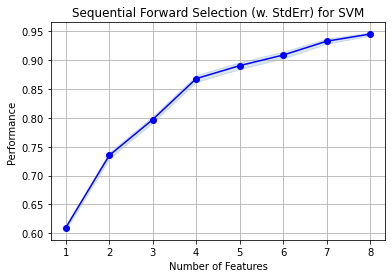

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(model1, 
          k_features=8, 
          forward=True, 
          floating=False, 
          cv=5)

sfs = sfs.fit(X_train_scaled, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr) for SVM')
plt.grid()
plt.show()

In [16]:

from sklearn.linear_model import LinearRegression
sffs = SFS(model1,
           k_features=8,
           forward=True,
           floating=True,
           scoring='recall',
           cv = 0)
#Use SFS to select the top 6 features 
feature_names=X.columns
sffs.fit(X_train_scaled, y_train, custom_feature_names=feature_names)

#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.9932723822666897],0.993272,"(Type_H,)"
2,"(4, 7)",[0.9190960841814731],0.919096,"(tool_wear, Type_M)"
3,"(4, 5, 7)",[0.9123684664481628],0.912368,"(tool_wear, Type_H, Type_M)"
4,"(2, 4, 5, 7)",[0.9220286355011212],0.922029,"(rot_speed, tool_wear, Type_H, Type_M)"
5,"(2, 4, 5, 6, 7)",[0.8982232189063308],0.898223,"(rot_speed, tool_wear, Type_H, Type_L, Type_M)"
6,"(0, 2, 3, 4, 5, 6)",[0.9499741245471796],0.949974,"(air_temp, rot_speed, torque, tool_wear, Type_..."
7,"(0, 1, 2, 3, 4, 5, 6)",[0.941521476625841],0.941521,"(air_temp, process_temp, rot_speed, torque, to..."
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[0.9503191305847852],0.950319,"(air_temp, process_temp, rot_speed, torque, to..."


In [17]:
features_selected_svm=df_SFFS_results['feature_names'][8]
f=list(features_selected_svm)

In [18]:
X_train3=X_train[f]
X_valid3=X_valid[f]
X_test3=X_test[f]
scaler = StandardScaler().fit(X_train3)
X_train_scaled2 = scaler.transform(X_train3)

X_valid_scaled2= scaler.transform(X_valid3)
X_test_scaled2 = scaler.transform(X_test3)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model1.fit(X_train_scaled2, y_train)
forest_y_pred = model1.predict(X_valid_scaled2)
print(f"Support Vector Classification Report on validation data using bidirectional elemination(wrapper method)")
cm=confusion_matrix(y_valid, forest_y_pred)
print(cm)
print(classification_report(y_valid, forest_y_pred), "\n")

Support Vector Classification Report on validation data using bidirectional elemination(wrapper method)
[[1802  130]
 [  11   57]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1932
           1       0.30      0.84      0.45        68

    accuracy                           0.93      2000
   macro avg       0.65      0.89      0.70      2000
weighted avg       0.97      0.93      0.94      2000
 

